In [2]:
%pylab inline
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 25,10;
sns.set_context('poster',font_scale=1.4);
import pandas as pd;
from collections import namedtuple
from pprint import pprint;
import sys;
from copy import deepcopy;
import pickle;
import pyccl as ccl
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr
%reload_ext autoreload
%autoreload 2
from fisher import Fisher, FullPlot, marginalize, plot_contours

Populating the interactive namespace from numpy and matplotlib


In [3]:
cosmo = ccl.Cosmology(Omega_c=0.2666, 
                       Omega_b=0.049, 
                       h=0.6727, 
                       sigma8=0.831, 
                       n_s=0.9645, 
                       transfer_function='eisenstein_hu')
obj = Fisher(cosmo)


In [7]:
obj._makeSourcePZ(False)
no_outliers = obj.dNdz_dict_source
obj._makeSourcePZ(True)

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.6.0/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator KernelDensity from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [9]:
obj._makeSourcePZ??

Signature: obj._makeSourcePZ(implement_outliers=True)
Docstring: <no docstring>
Source:   
    def _makeSourcePZ(self, implement_outliers=True):
        # print('Making Source Photo-z')
        n = len(self.zmid)
        datapts = ([list(np.ones(int(self.dneff[i]/min(self.dneff)))*self.zmid[i]) for i in range(n)])
        datapts = list(chain.from_iterable(datapts)) # flatten
        bins = datapts[0::int(len(datapts)/5)]
        self.bins = bins
        bin_centers = [.5*fsum([bins[i]+bins[i+1]]) for i in range(len(bins[:-1]))]
        self.bin_centers = bin_centers
        self.pdf_z = SmailZ(self.zmid, np.array(self.dneff))
        dNdz_dict_source = {}
        qs = []
        for index, (x,x2) in enumerate(zip(bins[:-1], bins[1:])):
            bias = self.zbias[index]
            variance = self.zvariance[index]
            core = Core(self.zmid, zbias=0.1*bias, sigma_z=variance*0.05)
            tomofilter = uniform.pdf(self.zmid, loc=x, scale=x2-x)
            photoz_model = Pho

In [12]:
np.exp(kde.score_samples(np.array(self.zmid).reshape(-1, 1)))

KernelDensity(bandwidth=0.2)

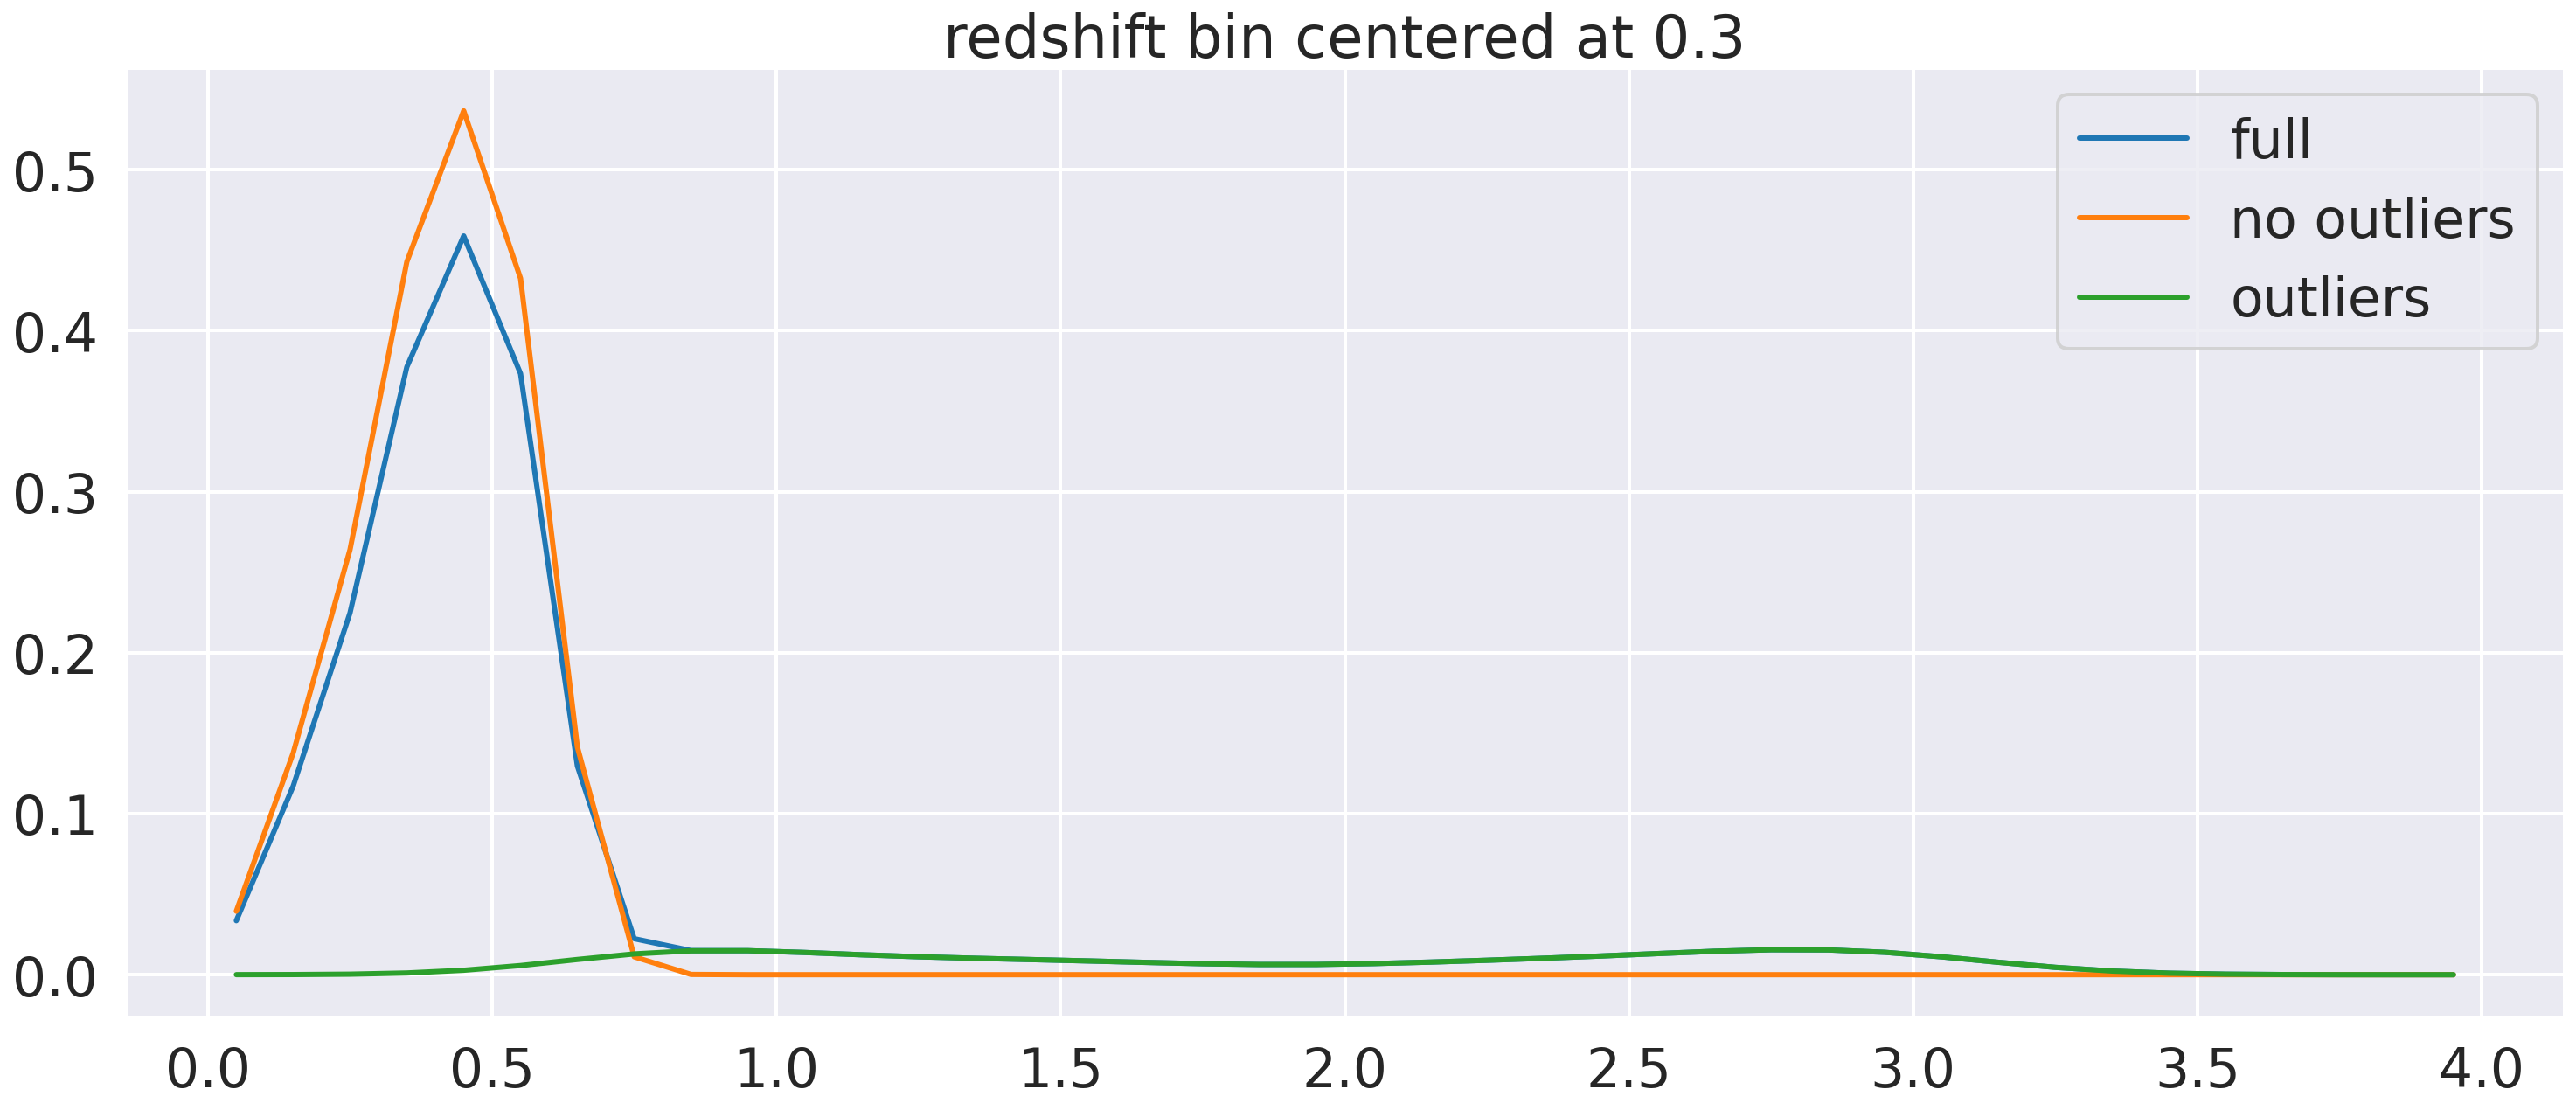

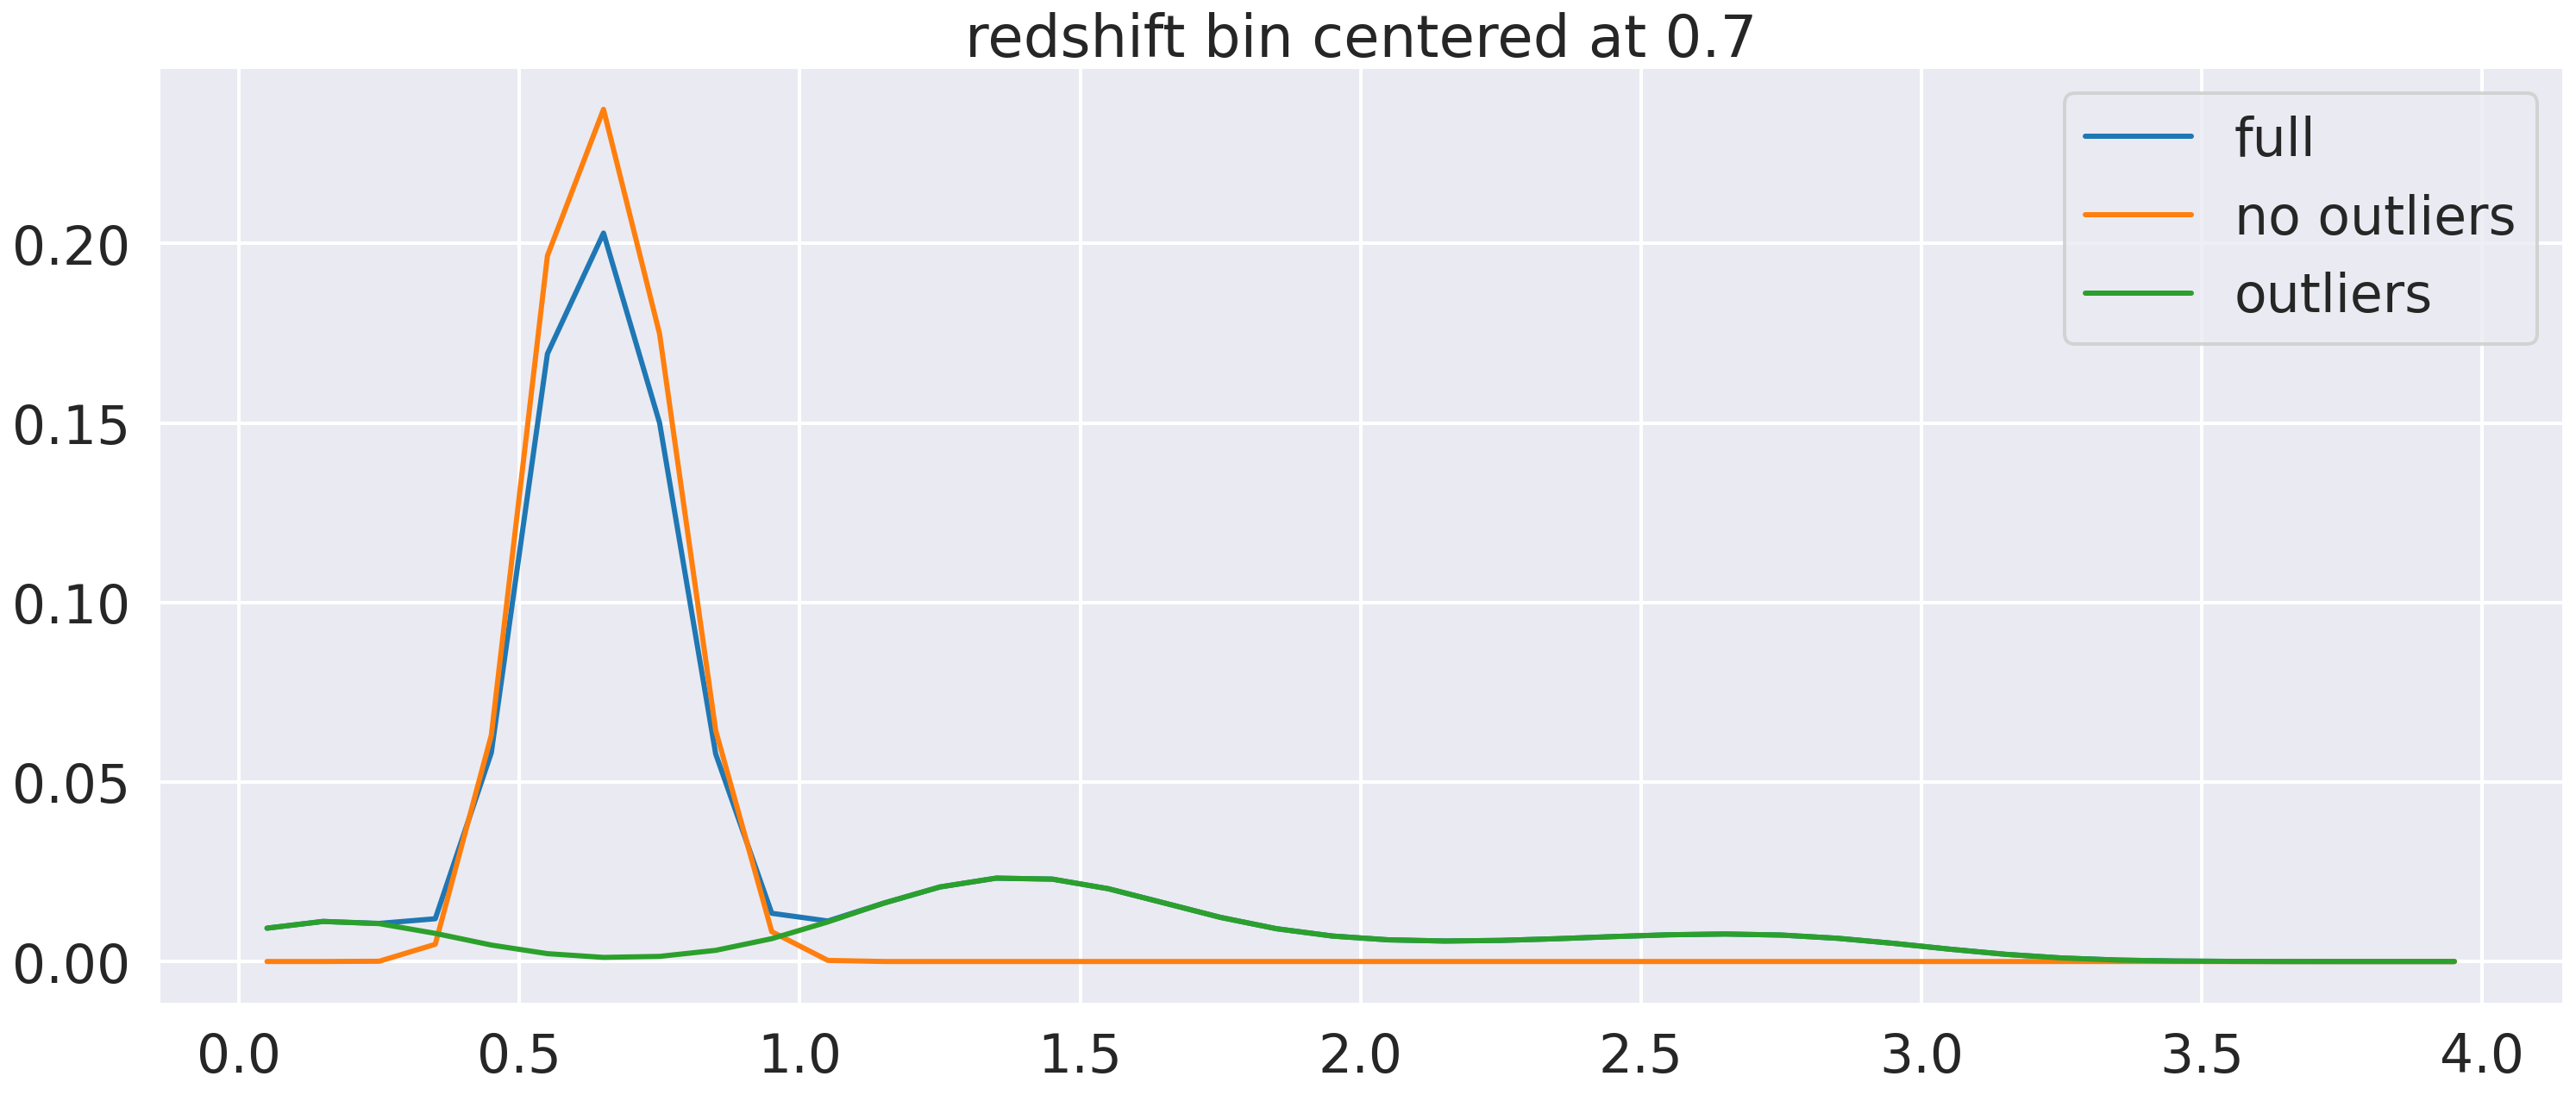

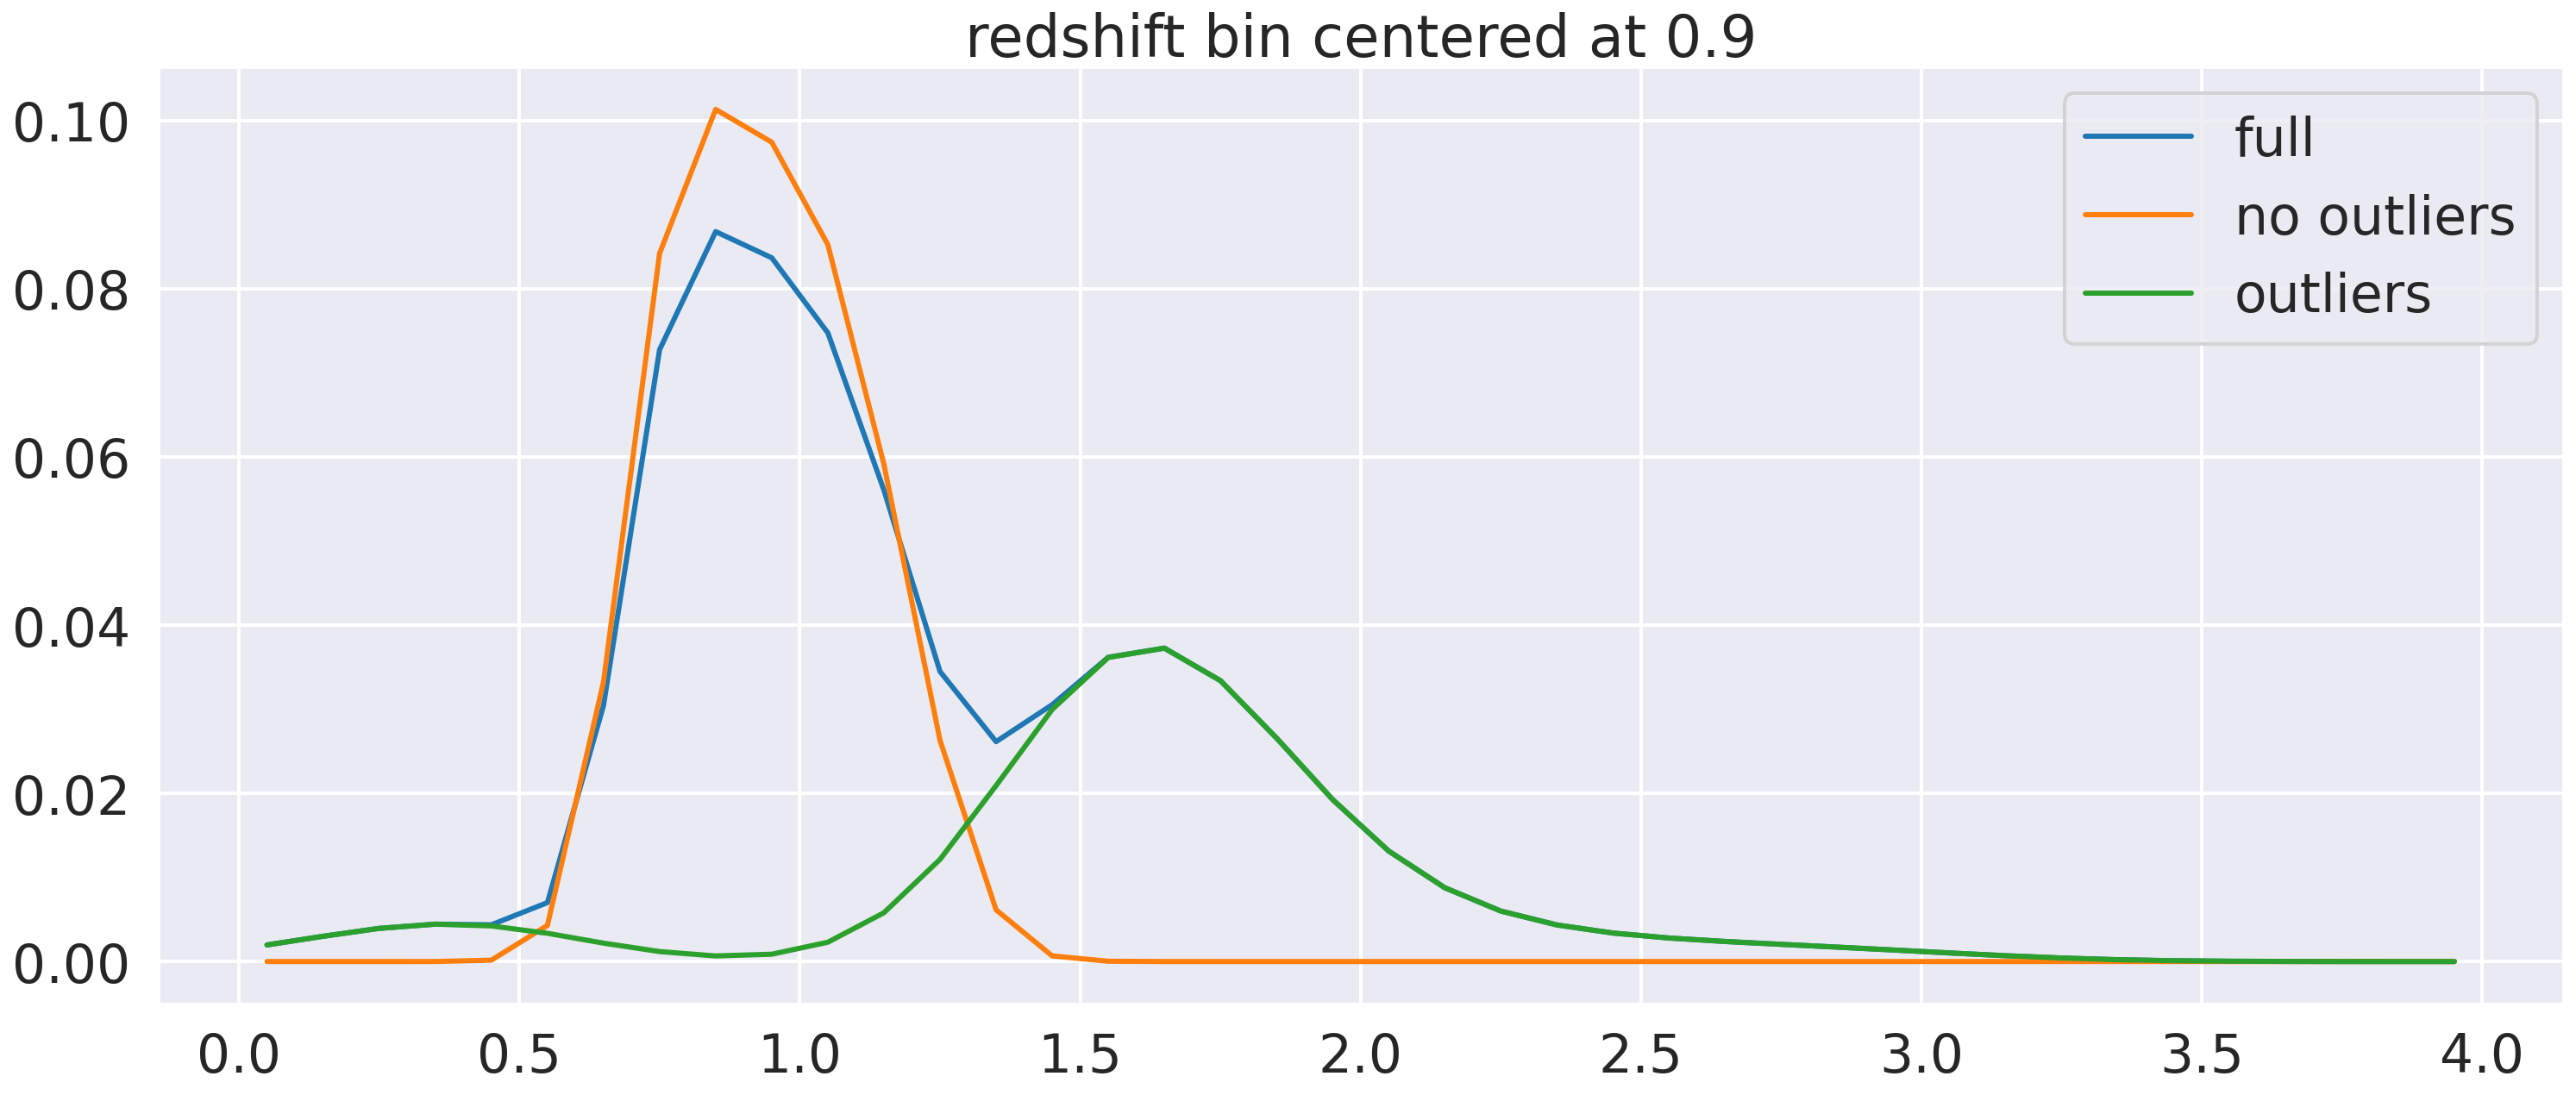

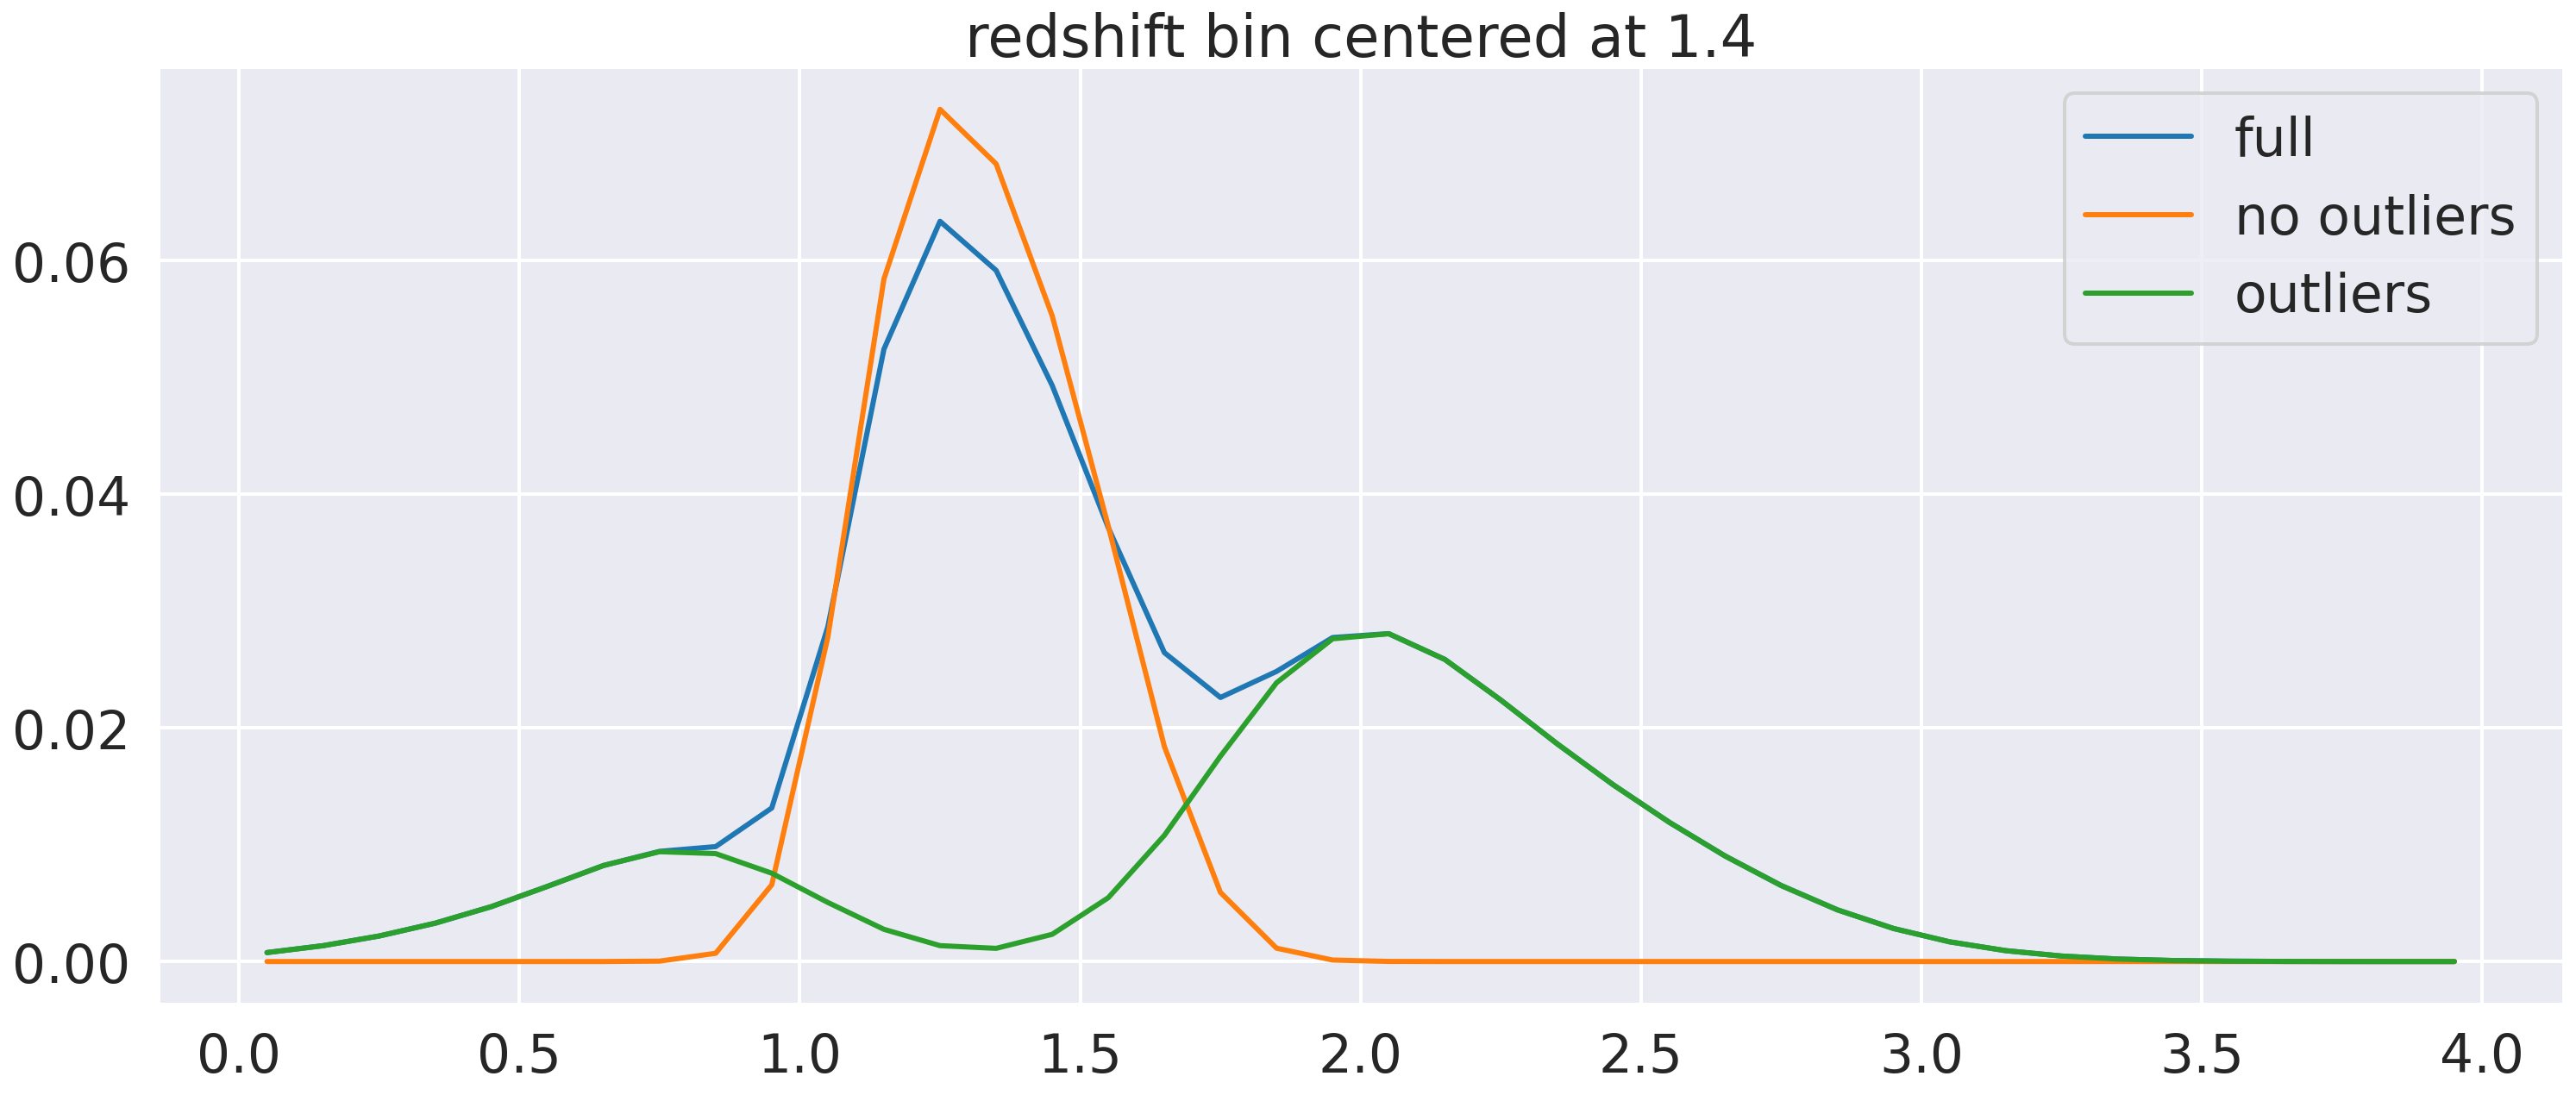

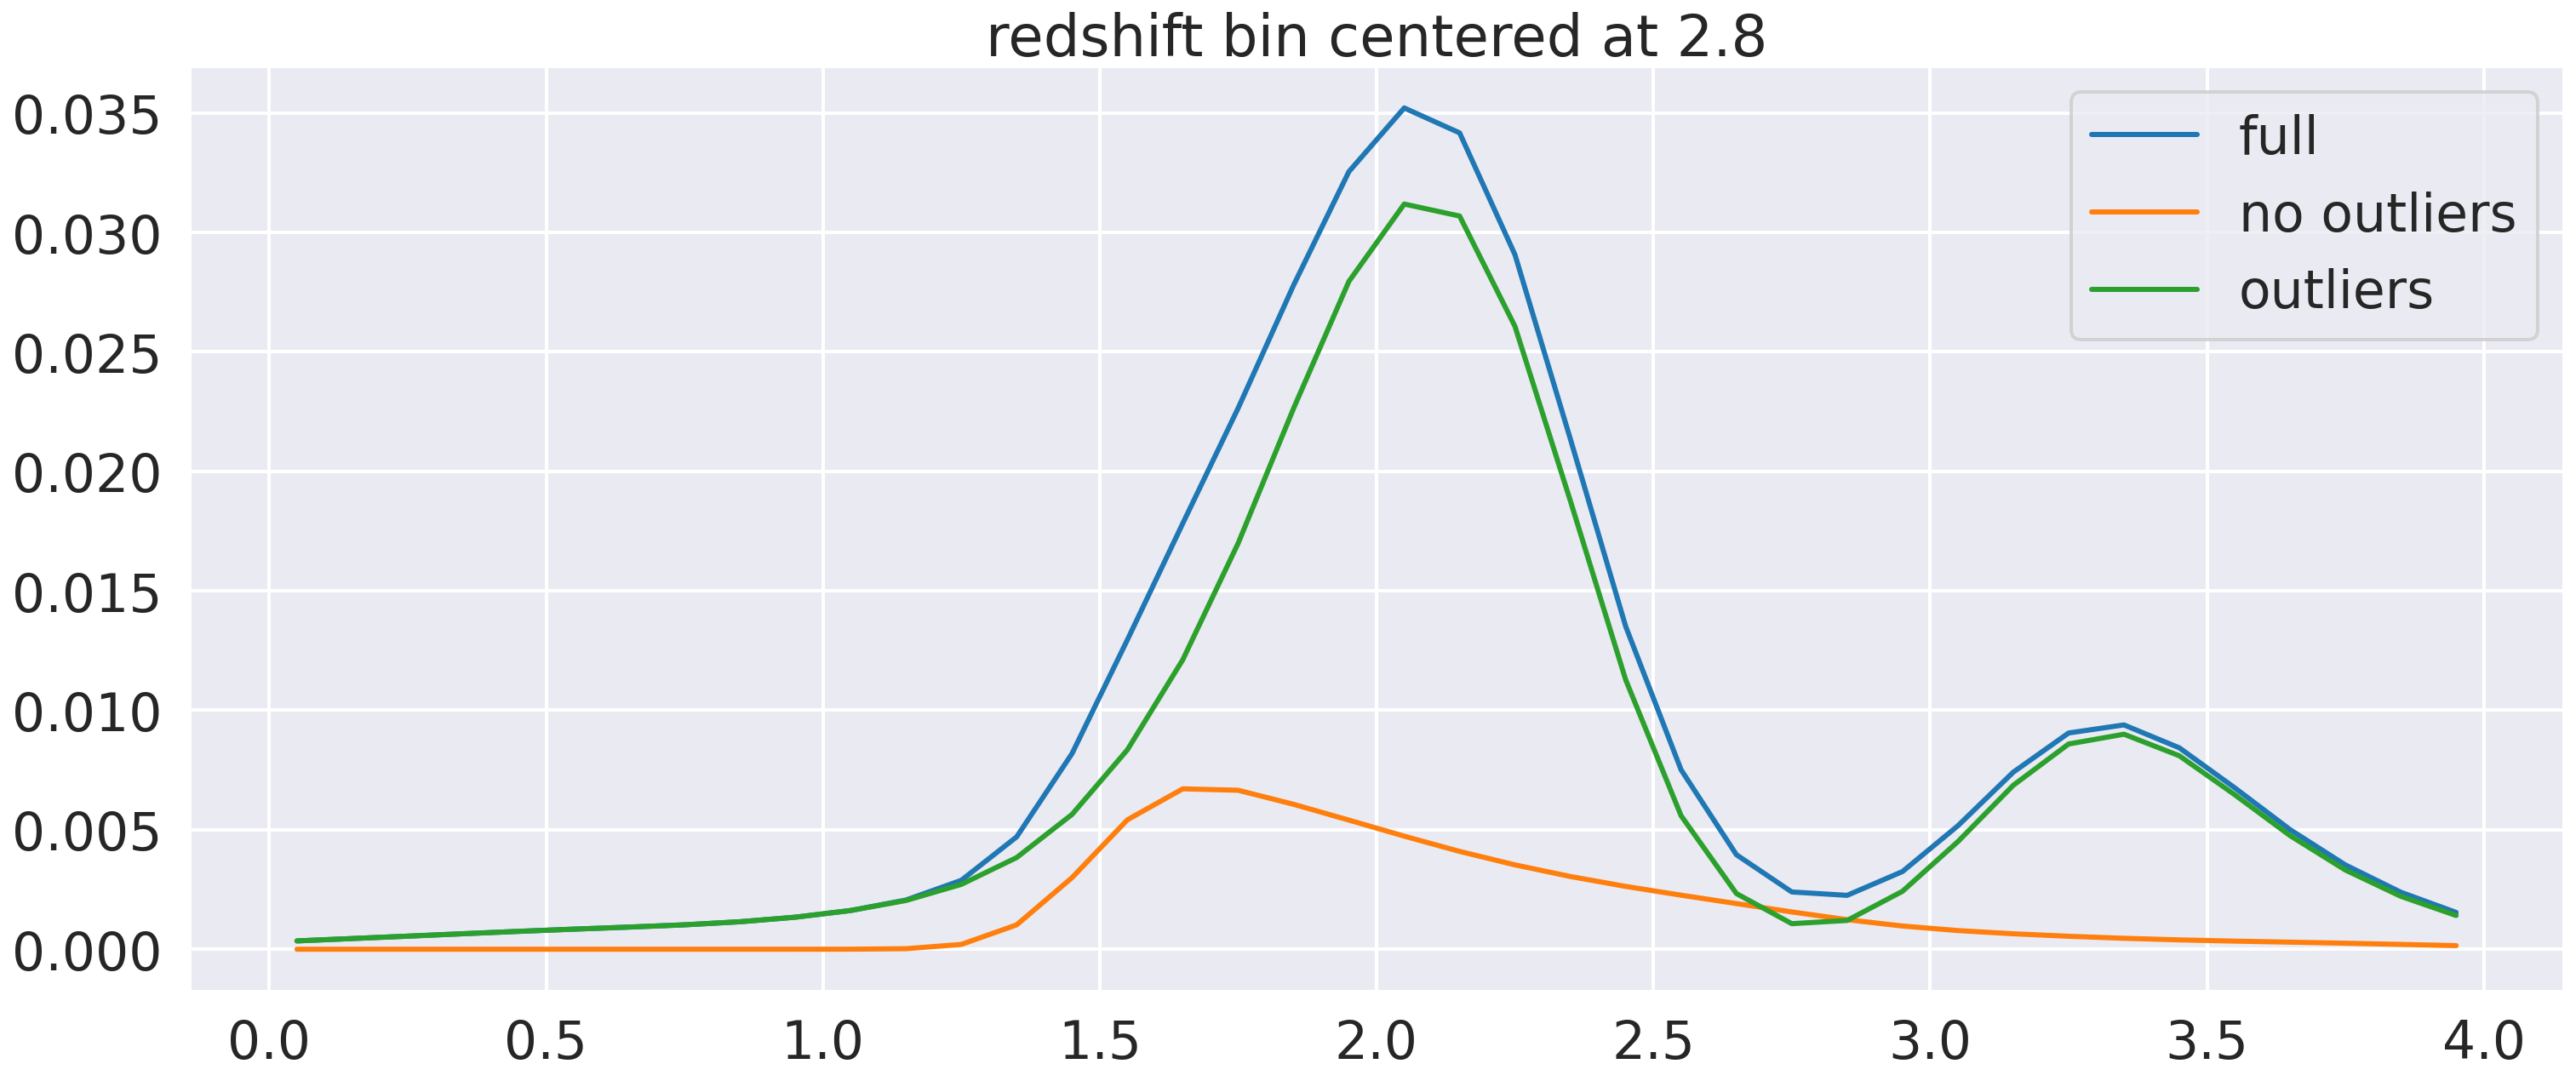

In [14]:
for i, key in enumerate(obj.dNdz_dict_source.keys()):
    kde = obj.KDEs[i]
    plt.figure()
    _ = sns.lineplot(x=obj.zmid, y=obj.dNdz_dict_source[key], markers=False, label='full')
    _ = sns.lineplot(x=obj.zmid, y=no_outliers[key], markers=False, label='no outliers')
    _ = sns.lineplot(x=obj.zmid, y=np.exp(kde.score_samples(np.array(obj.zmid).reshape(-1, 1)))*0.03, markers=False, label='outliers')
    plt.title(f'redshift bin centered at {key:.1f}')
plt.legend()